## Caso
- La empresa Mustage S.A. está desarrollando una plataforma para otorgar créditos de bajo monto
- El tiempo para completar exitosamente una consulta de información de clientes ante las fuentes de buro **no debe ser superior a 30 segundos** en **promedio**
- Muestra de **n = 50** clientes consultados
- La empresa está dispuesta a asumir un error del 5% en la prueba

**¿El proveedor de información satisface estadísticamente este requerimiento?**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import expon
from scipy.stats import uniform

In [3]:
muestra = [42, 35, 29, 45, 41, 57, 54, 47, 48, 56, 47, 35, 
           52, 31, 52, 55, 57, 58, 26, 29, 32, 37, 32, 34, 
           48, 20, 48, 51, 27, 24, 39, 40, 31, 34, 23, 24, 
           41, 58, 44, 48, 31, 23, 27, 55, 43, 47, 30, 57, 38, 51]
len(muestra)

50

In [4]:
# Hipotesis
# El scale es el valor de la hipotesis (lambda)

from scipy.stats import expon
media, var, sked, kurt = expon.stats(scale=30, moments="mvsk")

In [8]:
# Paso 1: parametro lambda
# Paso 2: HP

mu = 30 # Nula o igualdad
mu > 30

# Paso 3: Mejor estimador
# Estimador
# Paso 4: Distribucion
promedio = np.mean(muestra)
promedio

40.66

In [7]:
# Paso 5: VAlor estadistico
z = (promedio - mu)/np.sqrt(var/50)
z

2.5125860958161983

In [12]:
# Paso 6: Tolerancia de error
alpha = 0.05

# Criterios de rechazo
from scipy.stats import norm
data_norm = norm.rvs(size=1000000)

Text(0.5, 1.0, 'Distribucion Normal')

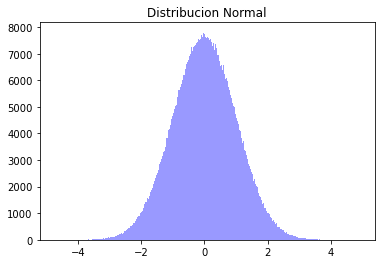

In [14]:
ax = sns.distplot(data_norm, bins = 500, kde=False, color="blue")
ax.set_title("Distribucion Normal")

In [15]:
valor_critico = norm.ppf(1-alpha, loc=0, scale=1) # loc = media 0 y scale = std 1
valor_critico

1.6448536269514722

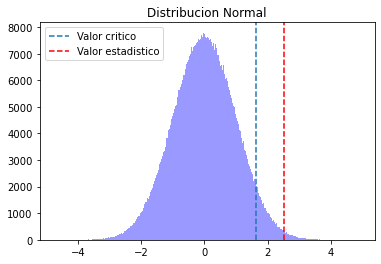

In [19]:
ax = sns.distplot(data_norm, bins = 500, kde=False, color="blue")
ax.axvline(x = valor_critico, linestyle="--", label ="Valor critico")
ax.axvline(x = z, linestyle="--", label ="Valor estadistico", color ="r")
ax.set_title("Distribucion Normal")
ax.legend()